In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

In [62]:
stock = yf.Ticker("TSLA")
volatility_data = stock.history(period="max", start='2019-01-02', end='2023-01-02')
volatility_data = np.log(volatility_data['Close']/volatility_data['Close'].shift(1))
volatility_data.fillna(0)
volatility_data = volatility_data.rolling(window=10).std()*np.sqrt(10)


In [63]:
volatility_data

Date
2019-01-02 00:00:00-05:00         NaN
2019-01-03 00:00:00-05:00         NaN
2019-01-04 00:00:00-05:00         NaN
2019-01-07 00:00:00-05:00         NaN
2019-01-08 00:00:00-05:00         NaN
                               ...   
2022-12-23 00:00:00-05:00    0.110606
2022-12-27 00:00:00-05:00    0.137245
2022-12-28 00:00:00-05:00    0.156758
2022-12-29 00:00:00-05:00    0.193782
2022-12-30 00:00:00-05:00    0.194842
Name: Close, Length: 1008, dtype: float64

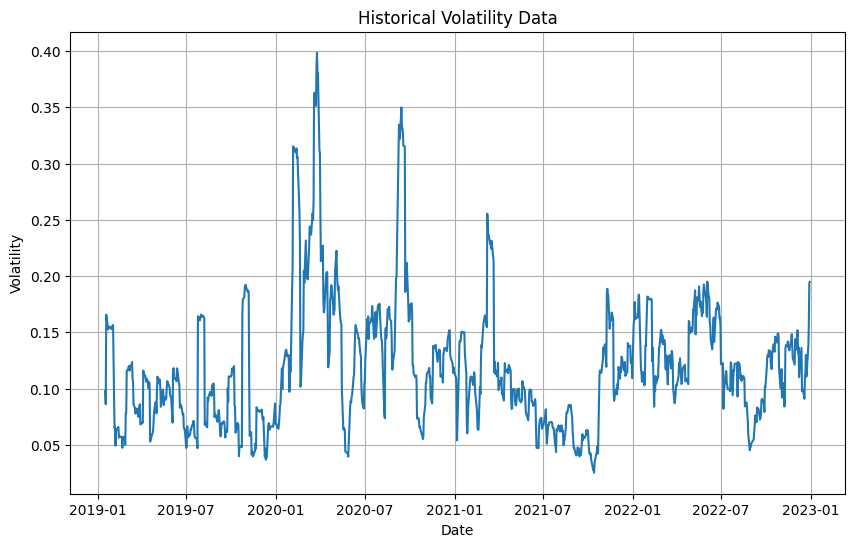

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(volatility_data.index, volatility_data)

plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Historical Volatility Data")
plt.grid(True)

plt.show()

In [65]:
df = pd.read_csv("data/tsla_2019_2022.csv")

In [79]:
df['[C_DELTA]'] = pd.to_numeric(df['[C_DELTA]'])

In [80]:
#df = df[(df['[C_DELTA]']>= 0.45) & (df['[C_DELTA]']<= 0.55)]
df_10 = df[df['[DTE]'] == 1]
df_10

,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
1301,1556827200,2019-05-0216:00,2019-05-02,16.0,244.08,2019-05-03,1556913600,1.0,0.89054,0.00008,...,0.01,-0.00059,-0.00001,-0.00011,-0.00488,0.00000,2.80570,140.0,114.1,0.467
1302,1556827200,2019-05-0216:00,2019-05-02,16.0,244.08,2019-05-03,1556913600,1.0,0.89392,0.00015,...,0.01,-0.00019,0.00005,0.00048,-0.00478,-0.00023,2.64612,2.0,109.1,0.447
1303,1556827200,2019-05-0216:00,2019-05-02,16.0,244.08,2019-05-03,1556913600,1.0,0.89827,0.00014,...,0.02,-0.00013,0.00007,0.00035,-0.00518,0.00000,2.49187,0.0,104.1,0.426
1304,1556827200,2019-05-0216:00,2019-05-02,16.0,244.08,2019-05-03,1556913600,1.0,0.90180,0.00009,...,0.01,-0.00015,0.00001,-0.00021,-0.00519,0.00000,2.34288,3.0,99.1,0.406
1305,1556827200,2019-05-0216:00,2019-05-02,16.0,244.08,2019-05-03,1556913600,1.0,0.90582,0.00013,...,0.01,-0.00080,0.00009,0.00075,-0.00450,0.00000,2.19889,180.0,94.1,0.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657113,1567108800,2019-08-2916:00,2019-08-29,16.0,221.70,2019-08-30,1567195200,1.0,0.00202,0.00016,...,0.00,-0.99318,0.00053,0.00249,-0.08521,-0.01582,2.24676,NaN,108.3,0.488
2657114,1567108800,2019-08-2916:00,2019-08-29,16.0,221.70,2019-08-30,1567195200,1.0,0.00172,0.00019,...,0.00,-0.99386,0.00052,0.00229,-0.08553,-0.01607,2.32144,NaN,113.3,0.511
2657115,1567108800,2019-08-2916:00,2019-08-29,16.0,221.70,2019-08-30,1567195200,1.0,0.00025,0.00010,...,0.00,-0.99399,0.00049,0.00268,-0.08623,-0.01578,2.39322,NaN,118.3,0.534
2657116,1567108800,2019-08-2916:00,2019-08-29,16.0,221.70,2019-08-30,1567195200,1.0,0.00166,0.00017,...,0.00,-0.99395,0.00045,0.00251,-0.08631,-0.01597,2.46475,NaN,123.3,0.556


In [81]:
df_group = df_10.groupby(df_10['[QUOTE_DATE]']).min()

In [82]:
df_group

,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
[QUOTE_DATE],,,,,,,,,,,,,,,,,,,,,
2019-01-03,1546549200,2019-01-0316:00,16.0,300.37,2019-01-04,1546635600,1.0,0.00021,0.00000,-0.00003,...,0.0,-1.0,0.00000,0.00000,-1.54384,-0.00999,0.49428,0.0,0.4,0.001
2019-01-10,1547154000,2019-01-1016:00,16.0,345.00,2019-01-11,1547240400,1.0,0.00156,0.00000,0.00000,...,0.0,-1.0,-0.00002,-1009.99999,-1.30093,-0.02282,-0.00010,0.0,0.0,0.000
2019-01-17,1547758800,2019-01-1716:00,16.0,347.31,2019-01-18,1547845200,1.0,0.00000,-0.00003,-0.00005,...,0.0,-1.0,-0.00004,-0.00026,-1.25436,-0.01192,0.35681,0.0,0.2,0.001
2019-01-24,1548363600,2019-01-2416:00,16.0,291.70,2019-01-25,1548450000,1.0,0.00000,0.00000,-0.00009,...,0.0,-1.0,0.00000,-0.00021,-1.27630,-0.00980,-0.00020,0.0,0.8,0.003
2019-01-31,1548968400,2019-01-3116:00,16.0,306.85,2019-02-01,1549054800,1.0,0.00005,0.00000,-0.00009,...,0.0,-1.0,0.00000,-816.52636,-1.33031,-0.01585,0.00092,0.0,0.7,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,1669928400,2022-12-0116:00,16.0,194.81,2022-12-02,1670014800,1.0,0.00015,-0.00002,-0.00019,...,0.0,-1.0,-0.00001,-0.00022,-1.05751,-0.00658,0.54999,0.0,0.2,0.001
2022-12-08,1670533200,2022-12-0816:00,16.0,173.42,2022-12-09,1670619600,1.0,0.00008,-0.00001,-0.00026,...,0.0,-1.0,0.00000,-0.00004,-0.88637,-0.00561,0.52281,0.0,0.9,0.005
2022-12-15,1671138000,2022-12-1516:00,16.0,157.71,2022-12-16,1671224400,1.0,0.00000,-0.00002,-0.00033,...,0.0,-1.0,-0.00002,-0.00034,-0.88400,-0.00579,0.58891,0.0,0.2,0.001


In [83]:
df_group['[C_IV]']

[QUOTE_DATE]
2019-01-03    0.50989
2019-01-10   -0.00033
2019-01-17    0.36390
2019-01-24    0.46891
2019-01-31    0.46910
               ...   
2022-12-01   -0.00010
2022-12-08    0.53118
2022-12-15   -0.00011
2022-12-22    0.79182
2022-12-29    0.72092
Name: [C_IV], Length: 204, dtype: float64

In [84]:
volatility_data.index

DatetimeIndex(['2019-01-02 00:00:00-05:00', '2019-01-03 00:00:00-05:00',
               '2019-01-04 00:00:00-05:00', '2019-01-07 00:00:00-05:00',
               '2019-01-08 00:00:00-05:00', '2019-01-09 00:00:00-05:00',
               '2019-01-10 00:00:00-05:00', '2019-01-11 00:00:00-05:00',
               '2019-01-14 00:00:00-05:00', '2019-01-15 00:00:00-05:00',
               ...
               '2022-12-16 00:00:00-05:00', '2022-12-19 00:00:00-05:00',
               '2022-12-20 00:00:00-05:00', '2022-12-21 00:00:00-05:00',
               '2022-12-22 00:00:00-05:00', '2022-12-23 00:00:00-05:00',
               '2022-12-27 00:00:00-05:00', '2022-12-28 00:00:00-05:00',
               '2022-12-29 00:00:00-05:00', '2022-12-30 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1008, freq=None)

ValueError: x and y must have same first dimension, but have shapes (1008,) and (202,)

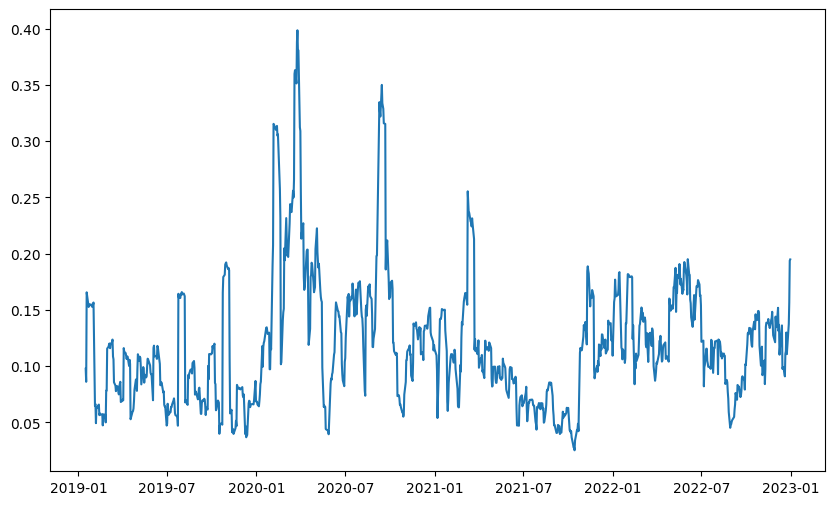

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(volatility_data.index, volatility_data)
plt.plot(volatility_data.index, df_group['[C_IV]'][2:])
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Historical Volatility Data")
plt.grid(True)

plt.show()